<a href="https://colab.research.google.com/github/eunyoungson/Deep_Learning/blob/main/1.Basic/01_colabExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab

In [ ]:
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [ ]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0


In [ ]:
!head -n 3 /proc/meminfo

MemTotal:       13333596 kB
MemFree:         8526108 kB
MemAvailable:   11603880 kB


In [ ]:
!nvidia-smi

Mon Feb  8 03:46:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |    305MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

!python --version

Python 3.6.9


In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [ ]:
print('한글')

한글


In [ ]:
!pwd

/content


In [ ]:
!hostname


8312a5cfaa10


In [ ]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Feb  4 15:26 .
drwxr-xr-x 1 root root 4096 Feb  8 03:31 ..
drwxr-xr-x 1 root root 4096 Feb  4 15:26 .config
drwxr-xr-x 1 root root 4096 Feb  4 15:26 sample_data


In [ ]:
!ls -l sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Feb  4 15:26 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Feb  4 15:26 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Feb  4 15:26 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Feb  4 15:26 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [ ]:
!cat sample*/R*

##1. Mnist 손글씨 분류

Machine Learning(SVC)

In [ ]:
import numpy as np
import pandas as pd
mnist =pd.read_csv('sample_data/mnist_train_small.csv',header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.shape

(20000, 785)

In [ ]:
import joblib
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split( 
    mnist.iloc[:,1:], mnist.iloc[:,0], test_size=0.25, stratify=mnist.iloc[:,0],random_state=2021
    )
X_train.shape, X_test.shape

((15000, 784), (5000, 784))

In [ ]:
X_train=X_train.astype('float')/255
X_test =X_test.astype('float')/255

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_train_scaled.shape, X_test_scaled.shape

In [ ]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = sv_clf.predict(X_test)
accuracy_score(y_test, pred)


0.9714

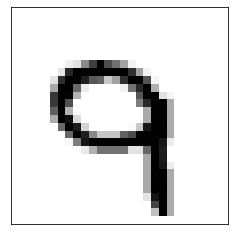

In [ ]:
digit = X_test.iloc[1000,:].values.reshape(28,28)
plt.figure(figsize=(4,4))
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')
plt.show()

##2.Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#One-hot Encording
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test =to_categorical(y_test)
Y_train.shape, Y_test.shape

((15000, 10), (5000, 10))

In [ ]:
#model 생성
model =Sequential()
model.add(Dense(512,input_shape=(784,), activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델실행환경 설정 compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [ ]:
#모델의 실행
model.fit(X_train, Y_train, validation_split=0.2,
          epochs=20, batch_size=200)

Epoch 1/20
60/60 [==============================] - 3s 8ms/step - loss: 1.0075 - accuracy: 0.7144 - val_loss: 0.2858 - val_accuracy: 0.9147
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: 0.2486 - accuracy: 0.9298 - val_loss: 0.2402 - val_accuracy: 0.9287
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.9543 - val_loss: 0.1920 - val_accuracy: 0.9460
Epoch 4/20
60/60 [==============================] - 0s 4ms/step - loss: 0.1287 - accuracy: 0.9652 - val_loss: 0.1902 - val_accuracy: 0.9453
Epoch 5/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9748 - val_loss: 0.1590 - val_accuracy: 0.9550
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.9859 - val_loss: 0.1513 - val_accuracy: 0.9543
Epoch 7/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9872 - val_loss: 0.1522 - val_accuracy: 0.9537
Epoch 8/20
60/60 [==

In [ ]:
model.evaluate(X_test, Y_test) # 앞에는 loss 뒤에는 accuracy

157/157 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9690


[0.11705701053142548, 0.968999981880188]

In [ ]:
acc = model.evaluate(X_test, Y_test)[1]
print(f'Accuracy = {acc:.4f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9690
Accuracy = 0.9690
